In [1]:
from mnist_loader import load_data_wrapper
import numpy as np
import matplotlib.pyplot as plt


In [2]:

training_data, validation_data, test_data = load_data_wrapper()

""" must add the files from course to the project directory"""


' must add the files from course to the project directory'

In [3]:
len(training_data)
type(training_data)
print(training_data[1][0].shape)

(784, 1)


In [4]:
img1 = training_data[0][0]      # array of pixels
lb1 =  training_data[0][1]      # one-hot vector label            

# print out the shape of img1, lb1
print(img1.shape)
print(lb1.shape)

# or equivalently, unpacking the 2-tuple (image, label)
# img1, lb1 = training_data[0]

(784, 1)
(10, 1)


In [5]:
print(lb1)#number 5


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
def plot_image(image):
    """ Plot a single MNIST image. 
        Argument image is a numpy.ndarray of shape (784,1)
    """
    image = image.reshape(28,28)
    fig, axes = plt.subplots()
    axes.matshow(image, cmap=plt.cm.binary)
    plt.show()
    

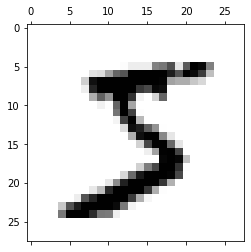

In [7]:
plot_image(img1)


In [8]:
def plot_images(images):
    """ Plot a list of MNIST images.
        Argument images is a list of (image, label) tuples. 
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.matshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    

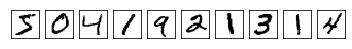

In [9]:
plot_images(training_data[0:10])


In [10]:

def sigmoid(x):
    """Returns the output of the sigmoid or logistic function."""
    return 1/(1+np.exp(-x))

In [11]:
x = np.array([[1],[2],[3]])
sigmoid(x)

array([[0.73105858],
       [0.88079708],
       [0.95257413]])

In [12]:

with open("parameters.npy", mode="rb") as r:
    parameters = np.load(r,allow_pickle = True)
    #problem solved using np.load(file,allow_pickle = True) as allow_pickle was False
    W1, B1, W2, B2 = parameters

In [13]:
def f(x, W1, W2, B1, B2):
    """Return the output of the network if ``x`` is input image and
    W1, W2, B1 and B2 are the learnable parameters or weights. """
    Z1 = np.dot(W1, x) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = sigmoid(Z2)
    return A2

In [21]:
f(training_data[0][0],W1,W2,B1,B2)


array([[6.68932951e-06],
       [4.91861537e-08],
       [2.13952089e-08],
       [4.12030050e-01],
       [2.31929604e-09],
       [9.93000368e-01],
       [3.75187346e-12],
       [1.12372205e-04],
       [2.81225375e-10],
       [2.15424607e-07]])

In [15]:
np.argmax(f(training_data[10][0],W1,W2,B1,B2))


3

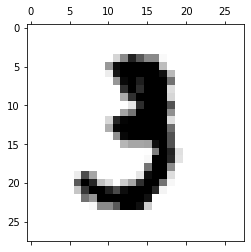

In [16]:
plot_image(training_data[10][0])


In [17]:
def predict(images, W1, W2, B1, B2):
    """Return the predictions for a list of images given the parameters.
    """
    predictions = []  # empty list
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(np.argmax(a)) # add prediction to predictions list
    return predictions


In [18]:
predict(training_data[0:10],W1,W2,B1,B2)


[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

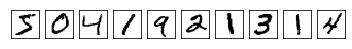

In [20]:
plot_images(training_data[0:10])